<a href="https://colab.research.google.com/github/Sanjay13072005/skillcraft-technology/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.33      0.33      0.33         3

    accuracy                           0.90        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.90      0.90      0.90        39

Confusion Matrix:
 [[34  2]
 [ 2  1]]


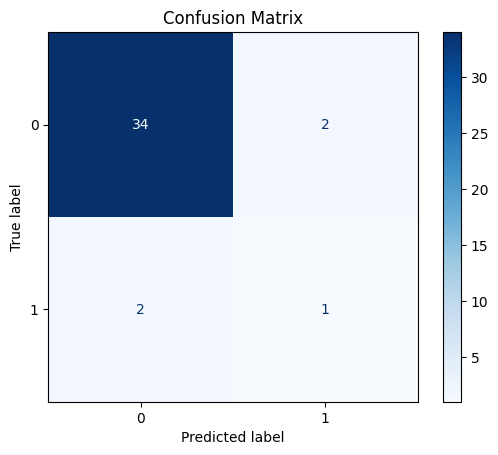

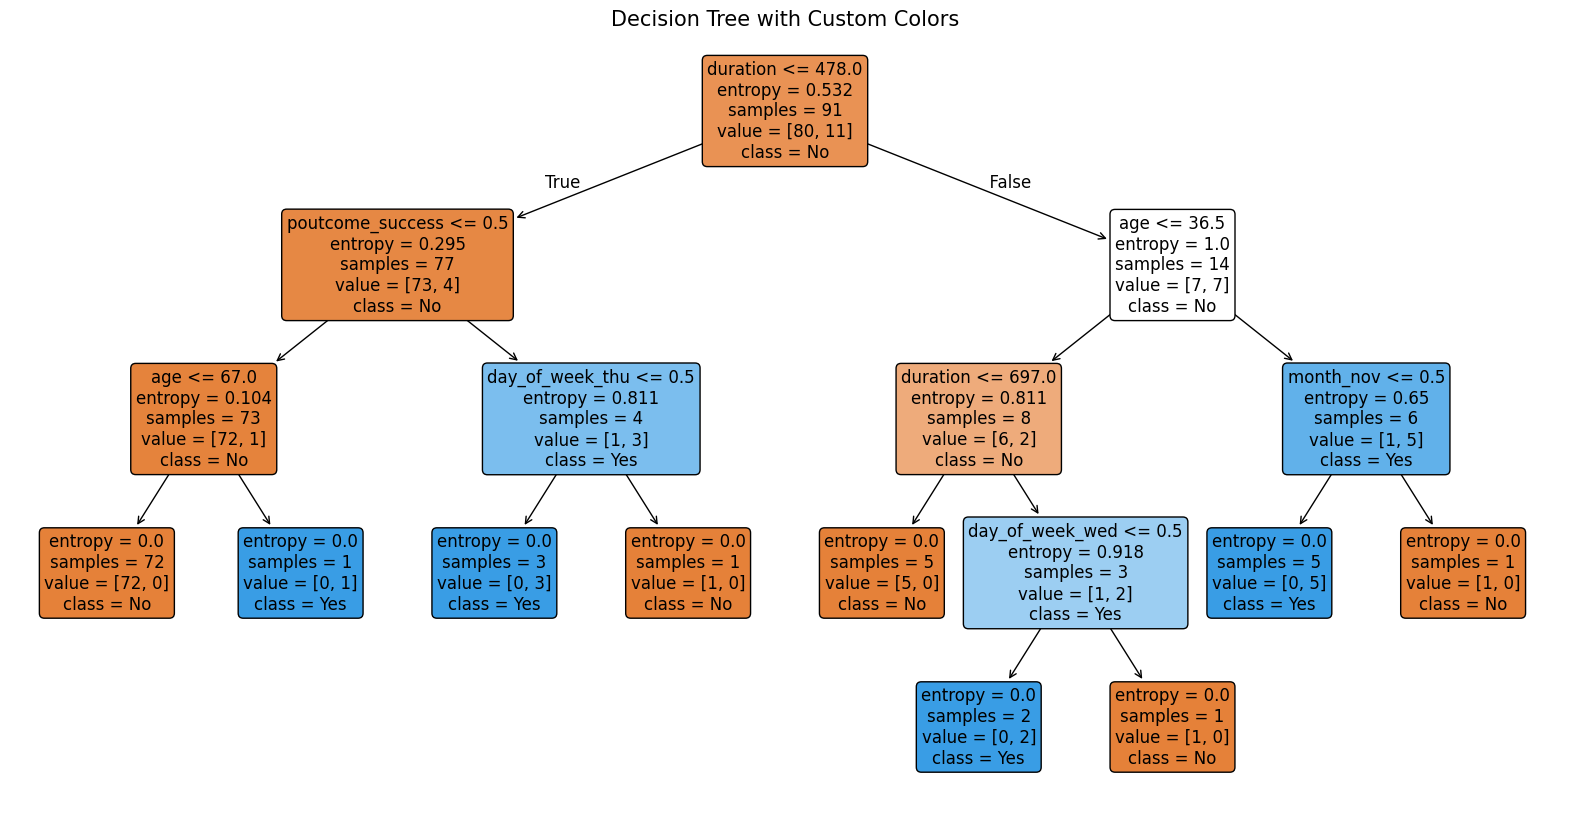

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = pd.read_csv("/content/drive/MyDrive/internship projects/bank-additional.csv", sep=';')

# Step 2: Data Preprocessing
data = data.head(130)  # Use only the first 130 rows

categorical_cols = data.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(data, columns=categorical_cols[:-1], drop_first=True)

X = encoded_data.drop('y', axis=1)
y = (data['y'] == 'yes').astype(int)  # Target variable (1 = 'yes', 0 = 'no')

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build and Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 7: Visualize the Decision Tree with Custom Colors
plt.figure(figsize=(20, 10))
plt.rcParams['text.color'] = 'black'
plt.rcParams['patch.edgecolor'] = 'black'
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    rounded=True,
    fontsize=12,
)
ax = plt.gca()
for node in ax.findobj(match=plt.Polygon):
    # Set colors: alternate between yellow and light blue
    node.set_facecolor("lightgreen" if node.get_facecolor() == (1.0, 0.647, 0.0, 1.0) else "lightblue")

plt.title("Decision Tree with Custom Colors", fontsize=15)
plt.show()
